In [1]:
import Script.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import Script.Validation as Validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

import joblib 
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## 1. Unsupervised learning: Clustering

In [ ]:
kmeans = KMeans(n_clusters=5)
pred_km = kmeans.fit_predict(NW_020120)

In [ ]:
clus = pred_km.reshape(dim_NW_020120)
plt.figure(figsize = (20,20))
plt.imshow(clus, cmap='Set2')
#Image.show_pred(clus, size=50)

In [9]:
np.unique(pred_km)

array([0, 1, 2, 3, 4])

In [54]:
t = [1 if x==1 else 0 for x in pred_km]

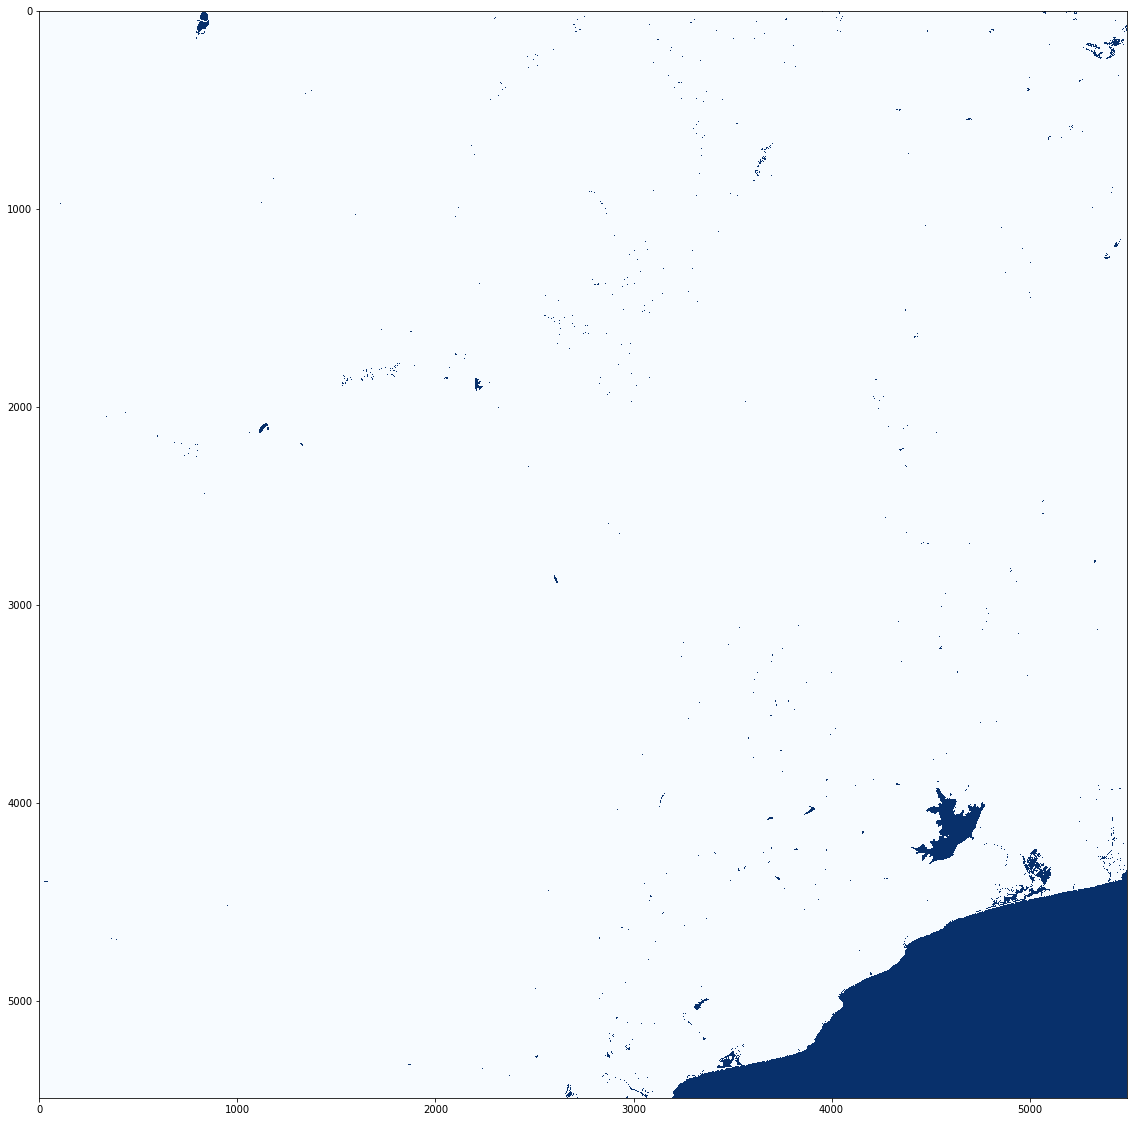

In [55]:
t = np.array([t]).reshape(dim_SE_020120)
plt.figure(figsize = (20,20))
plt.imshow(t, cmap='Blues')

In [64]:
np.savetxt('t.csv', t, delimiter=',')

## 1. Import training data

In [2]:
x_cols = ['B1','B2','B3','B4','B5','B6','B7','B8', 'B8A', 'B9','B10','B11','B12']

In [3]:
# Create training dataset
training = pd.read_csv('Data/Final/onlyres_training.csv', index_col = 0, header = 0) 

In [4]:
X = training[x_cols]
Y = training['Content']

## 2. Regularization

We will use regularization to prevent overfitting.

### a) Logistic Regression

Iteration number 0/14. Error is 1.1613950190772901
Iteration number 1/14. Error is 1.1589804932901544
Iteration number 2/14. Error is 1.1599463036050086
Iteration number 3/14. Error is 1.1589804932901544
Iteration number 4/14. Error is 1.1420787894599045
Iteration number 5/14. Error is 1.1406298874252057
Iteration number 6/14. Error is 1.1469075728507
Iteration number 7/14. Error is 1.1473903963870697
Iteration number 8/14. Error is 1.1618778426136593
Iteration number 9/14. Error is 1.138698231815044
Iteration number 10/14. Error is 1.1691213849946123
Iteration number 11/14. Error is 1.1555998773445386
Iteration number 12/14. Error is 1.173468044458104
Iteration number 13/14. Error is 1.2792252417271752
Accuracy - regularized log-reg - 1.139
Optimal lambda: 100.0



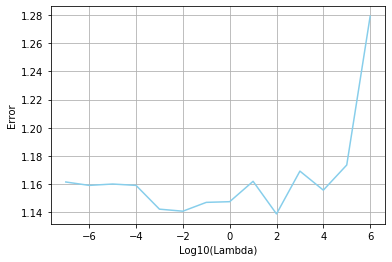

In [5]:
Validation.cross_val(training,5)

Iteration number 0. Error is 78.30260549312464
Iteration number 1. Error is 17.76395207722442
Iteration number 2. Error is 21.836135211066072
Iteration number 3. Error is 20.723003820334114
Iteration number 4. Error is 20.77449318959771
Iteration number 5. Error is 19.882133278697278
Iteration number 6. Error is 20.527372924909756
Iteration number 7. Error is 20.162298818447066
Iteration number 8. Error is 20.59302620716305
Iteration number 9. Error is 20.136295240075327
Accuracy - regularized log-reg - 11.371
Optimal number of iterations: 0



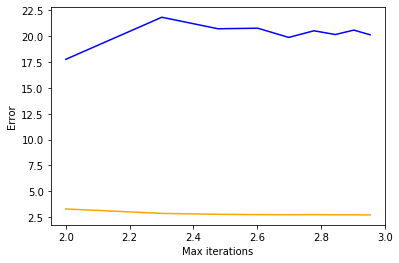

In [7]:
Validation.iter_cross_val(training, 2)

In [12]:
def cross_val(training,K):
        from sklearn import model_selection

        neighbors = range(2,10)
        
        CV = model_selection.KFold(n_splits = K, shuffle = False)
        
        knn_gen_acc = np.zeros(len(neighbors))
        
        n = len(neighbors)
        
        for s in range(0, n):
            k = 0
            
            knn_val_acc = np.zeros(K)
            
            X = training[x_cols].values
            y = training['Content'].values
            
            for train_index, val_index in CV.split(X, y):
    
                # extract training and test set for current CV fold
                X_train, y_train = X[train_index,:], y[train_index]
                X_val, y_val = X[val_index,:], y[val_index]
            
                knn_model = KNeighborsClassifier(n_neighbors=neighbors[s]) 
                knn_model = knn_model.fit(X_train, y_train)
    
                knn_y_val_estimated = knn_model.predict(X_val).T
                
                knn_val_acc[k] = np.mean( y_val != knn_y_val_estimated)*100
                
                k += 1
            
            knn_gen_acc[s] = np.sum(knn_val_acc) / len(knn_val_acc)
            print('Iteration number {0}/{1}. Error is {2}'.format(s,n, knn_gen_acc[s]))
            
        knn_max_acc = np.min(knn_gen_acc)       
        opt_lambda_index = np.argmin(knn_gen_acc) 
        opt_lambda = neighbors[opt_lambda_index]
       
        print('Accuracy - regularized knn - {0}'.format(np.round(knn_max_acc, decimals = 3)))
        print('Optimal lambda: {0}'.format(opt_lambda))
        print()
        
        plt.plot(neighbors,knn_gen_acc, color = 'skyblue')
        plt.xlabel('N neighbors')
        plt.ylabel('Error')
        plt.grid()

Iteration number 0/8. Error is 0.04201300521948008
Iteration number 1/8. Error is 0.04346177899251677
Iteration number 2/8. Error is 0.04539339962222509
Iteration number 3/8. Error is 0.04877379402497012
Iteration number 4/8. Error is 0.0579490736371423
Iteration number 5/8. Error is 0.05988069426685063
Iteration number 6/8. Error is 0.06277818351216857
Iteration number 7/8. Error is 0.06615851961415814
Accuracy - regularized knn - 0.042
Optimal lambda: 2



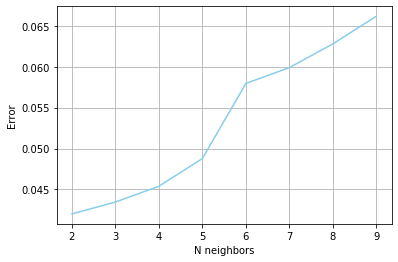

In [13]:
cross_val(training,5)

In [36]:
def cross_val(training,K):
        from sklearn import model_selection
        import numpy as np

        neighbors = np.arange(0.0,0.1,0.01)
        
        CV = model_selection.KFold(n_splits = K, shuffle = False)
        
        knn_gen_acc = np.zeros(len(neighbors))
        
        n = len(neighbors)
        
        for s in range(0, n):
            k = 0
            
            knn_val_acc = np.zeros(K)
            
            X = training[x_cols].values
            y = training['Content'].values
            
            for train_index, val_index in CV.split(X, y):
    
                # extract training and test set for current CV fold
                X_train, y_train = X[train_index,:], y[train_index]
                X_val, y_val = X[val_index,:], y[val_index]
            
                knn_model = RandomForestClassifier(min_impurity_decrease=neighbors[s]) 
                knn_model = knn_model.fit(X_train, y_train)
    
                knn_y_val_estimated = knn_model.predict(X_val).T
                
                knn_val_acc[k] = np.mean( y_val != knn_y_val_estimated)*100
                
                k += 1
            
            knn_gen_acc[s] = np.sum(knn_val_acc) / len(knn_val_acc)
            print('Iteration number {0}/{1}. Error is {2}'.format(s,n, knn_gen_acc[s]))
            
        knn_max_acc = np.min(knn_gen_acc)       
        opt_lambda_index = np.argmin(knn_gen_acc) 
        opt_lambda = neighbors[opt_lambda_index]
       
        print('Accuracy - regularized knn - {0}'.format(np.round(knn_max_acc, decimals = 3)))
        print('Optimal lambda: {0}'.format(opt_lambda))
        print()
        
        plt.plot(neighbors,knn_gen_acc, color = 'skyblue')
        plt.xlabel('Min impurity decrease to split node')
        plt.ylabel('Error')
        plt.grid()

Iteration number 0/10. Error is 0.03863278571900141
Iteration number 1/10. Error is 3.041359920156882
Iteration number 2/10. Error is 4.451938069859277
Iteration number 3/10. Error is 5.198997863650437
Iteration number 4/10. Error is 7.8796336944878576
Iteration number 5/10. Error is 9.746547586674044
Iteration number 6/10. Error is 9.614229579653186
Iteration number 7/10. Error is 9.767311225826788
Iteration number 8/10. Error is 9.869206837577895
Iteration number 9/10. Error is 9.956129357809484
Accuracy - regularized knn - 0.039
Optimal lambda: 0.0



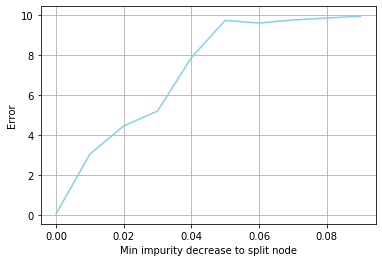

In [37]:
cross_val(training,5)

In [32]:
import numpy as np
index = 'NDWI'
rasterpath = "H:/sentinel2/Ghana/Training/28-12-18/SE/L2A_281218_20.tif"
root = "H:/sentinel2/Ghana/Training/28-12-18/NW/Shapefiles/"

thresh = np.arange(-0.12,0.1,0.01)
err = np.zeros(len(thresh))

for i in range(len(thresh)):
    y_true, y_pred = Validation.y_true_pred_index(index, root, rasterpath, t =thresh[i])
    err[i] = 1-Validation.evaluate(y_true,y_pred)[0]

min_err = np.min(err)       
opt_thresh_index = np.argmin(err) 
opt_thresh = thresh[opt_thresh_index]

print('Accuracy - regularized log-reg - {0}'.format(np.round(min_err, decimals = 3)))
print('Optimal lambda: {0}'.format(opt_thresh))
print()

plt.plot(thresh,err, color = 'skyblue')
plt.xlabel('Threshold')
plt.ylabel('Error')
plt.grid()

ValueError: Input shapes do not overlap raster.

Accuracy - regularized log-reg - 0.305
Optimal lambda: -40000



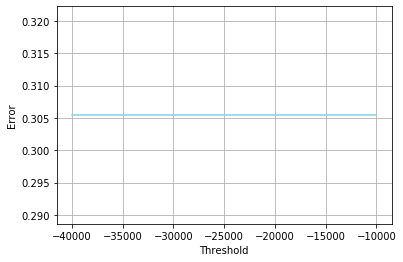

In [33]:
import numpy as np
index = 'AWEI'
rasterpath = "H:/sentinel2/Ghana/Training/28-12-18/NW/L2A_281218_20.tif"
root = "H:/sentinel2/Ghana/Training/28-12-18/NW/Shapefiles/"

thresh = np.arange(-40000,0,10000)
err = np.zeros(len(thresh))

for i in range(len(thresh)):
    y_true, y_pred = Validation.y_true_pred_index(index, root, rasterpath, t =thresh[i])
    err[i] = Validation.evaluate(y_true,y_pred)[0]

min_err = np.min(err)       
opt_thresh_index = np.argmin(err) 
opt_thresh = thresh[opt_thresh_index]

print('Accuracy - regularized log-reg - {0}'.format(np.round(min_err, decimals = 3)))
print('Optimal lambda: {0}'.format(opt_thresh))
print()

plt.plot(thresh,err, color = 'skyblue')
plt.xlabel('Threshold')
plt.ylabel('Error')
plt.grid()

## 3. Train algorithms

In [6]:
# Train model
LogReg=LogisticRegression(max_iter = 300, penalty = 'l2', C = 1/100, fit_intercept=False)
LogReg.fit(X, Y);

# Save the trained model as a pickle string. 
joblib.dump(LogReg, 'Algo/Final/loose_LogReg.pkl') 

['Algo/final_LogReg.pkl']

In [6]:
# Train model
DT = DecisionTreeClassifier()
DT.fit(X, Y);

# Save the trained model as a pickle string. 
joblib.dump(DT, 'Algo/Final/DT.pkl')

['Algo/Final/DT.pkl']

In [62]:
# Train model
RF = RandomForestClassifier()
RF.fit(X, Y);

# Save the trained model as a pickle string. 
joblib.dump(RF, 'Algo/Final/RF.pkl')

['Algo/Final/RF.pkl']

In [6]:
# Train model
KNN= KNeighborsClassifier()
KNN.fit(X, Y);

# Save the trained model as a pickle string. 
joblib.dump(KNN, 'Algo/Final/KNN.pkl')

['Algo/Final/KNN.pkl']

## 4. Interpretation

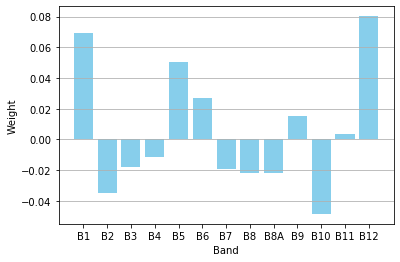

In [7]:
#LogReg = joblib.load('Algo/final_LogReg.pkl')
y = LogReg.coef_[0]
x = np.arange(len(y))
plt.bar(x, y, tick_label = x_cols, color = 'skyblue')
plt.xlabel('Band')
plt.ylabel('Weight')
plt.grid(axis='y', linestyle='-')

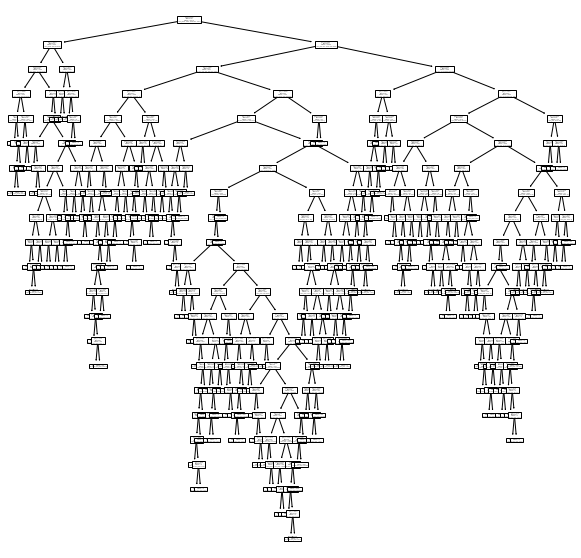

In [33]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(10, 10))  # whatever size you want
plot_tree(DT, ax=ax)
plt.show()

In [28]:
DT.get_depth()

21

In [29]:
DT.get_n_leaves()

260

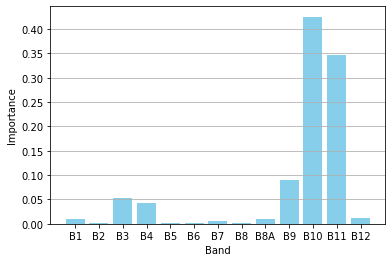

In [35]:
y = DT.feature_importances_
x = np.arange(len(y))
plt.bar(x, y, tick_label = x_cols, color = 'skyblue')
plt.xlabel('Band')
plt.ylabel('Importance')
plt.grid(axis='y', linestyle='-')

In [22]:
path = "H:/sentinel2/Ghana/Validation/02-01-20/NW/020120_20.tif"
img = Image.make_dataset(path)
NW_020120 = img['df'][x_cols]
dim_NW_020120 = img['dim']

NameError: name 'x_cols' is not defined

In [7]:
path = "H:/sentinel2/Ghana/Validation/02-01-20/SE/020120_20.tif"
img = Image.make_dataset(path)
SE_020120 = img['df'][x_cols]
dim_SE_020120 = img['dim']

In [9]:
pred_lg_NW_020120_vill = DT.predict(NW_020120)

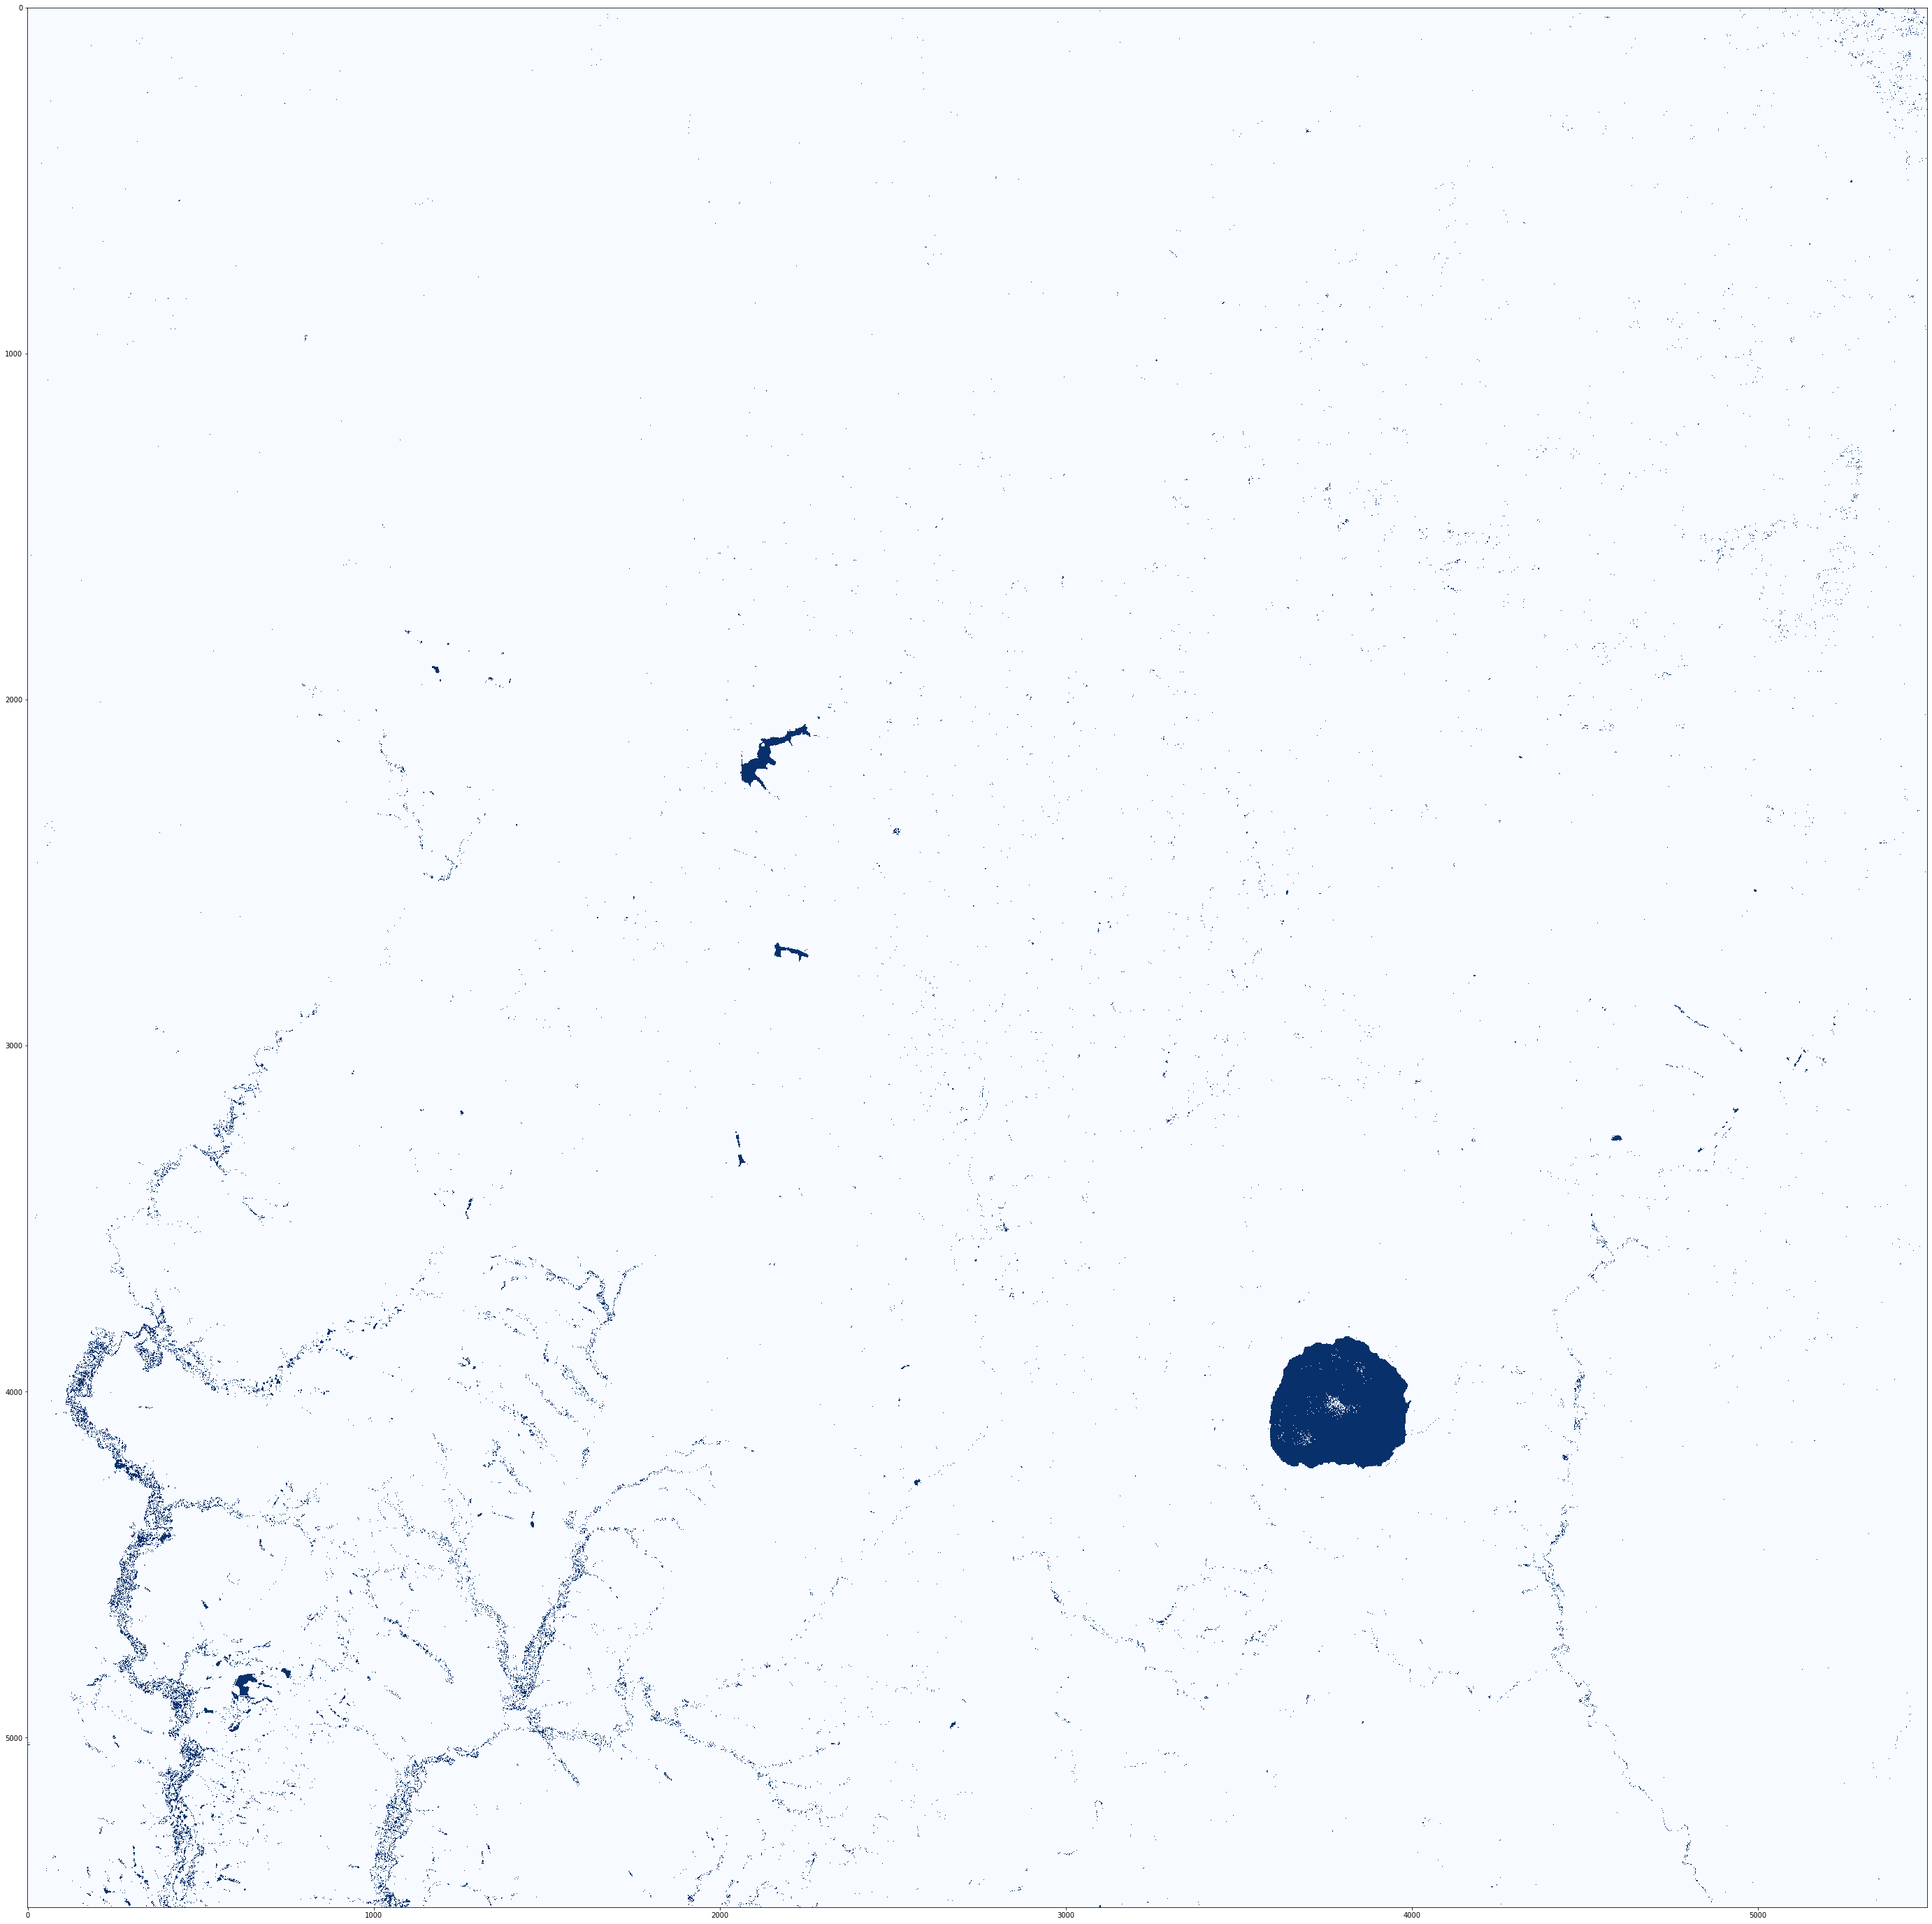

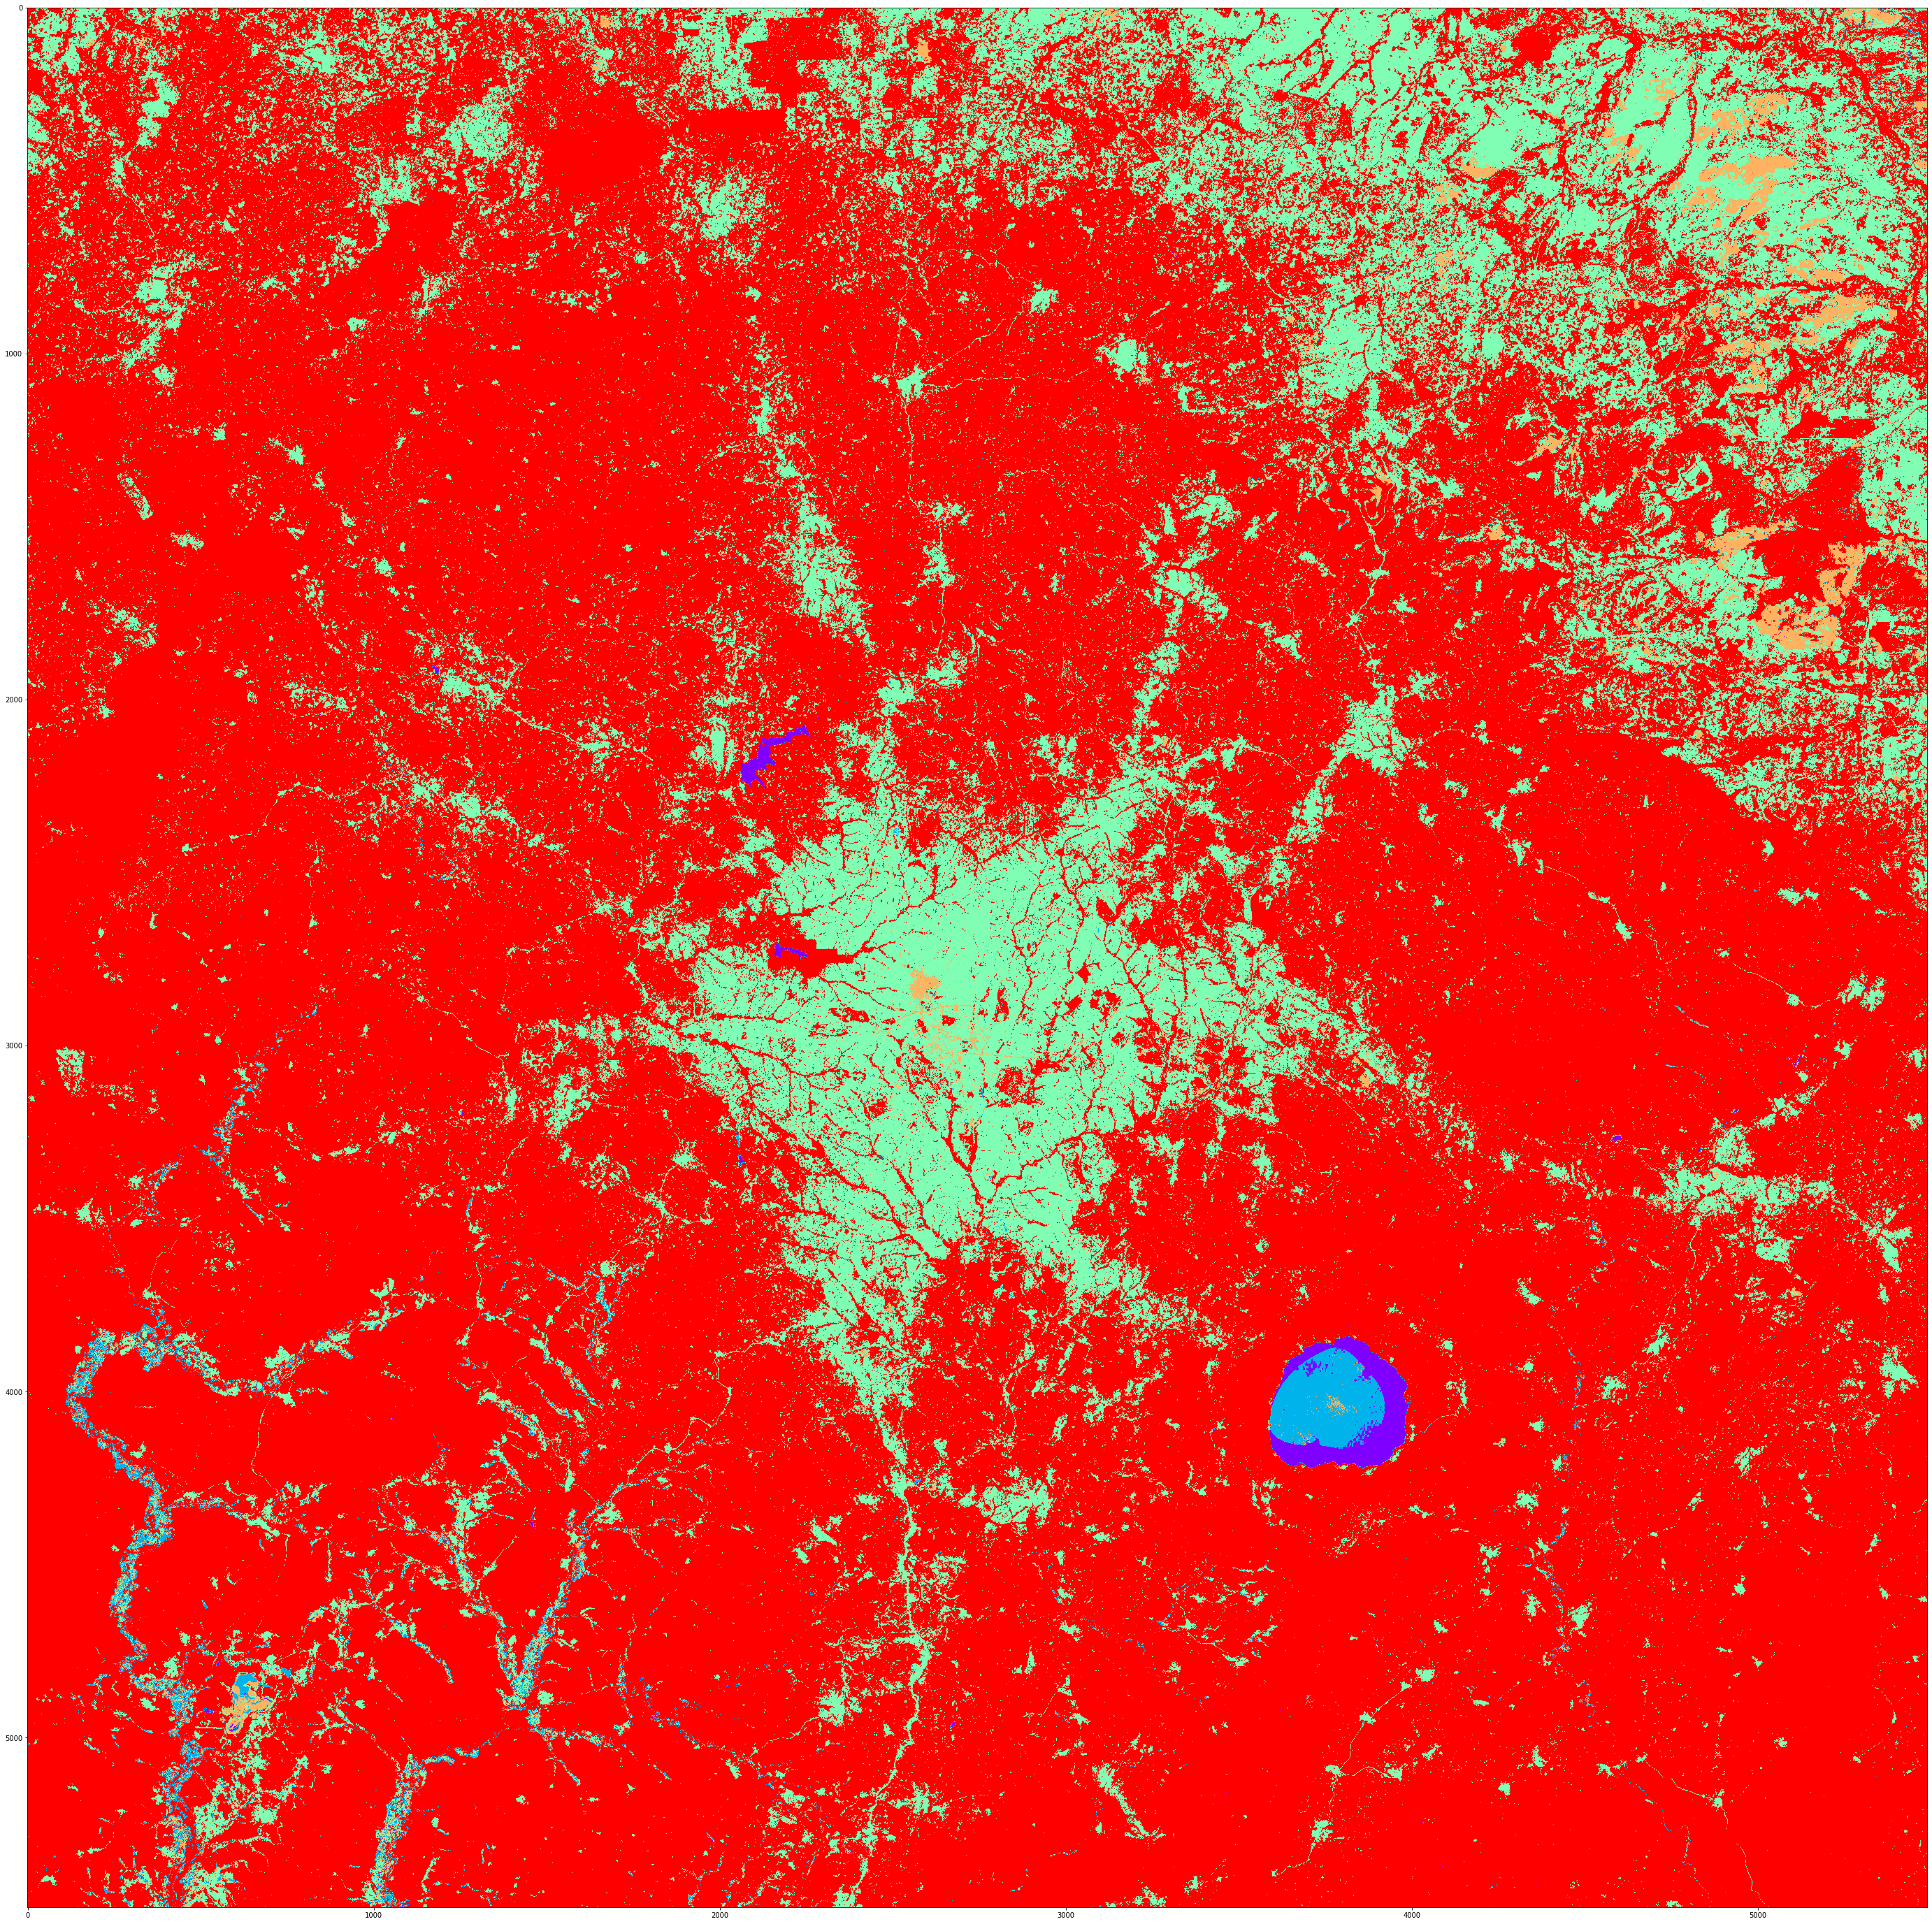

In [10]:
img = pred_lg_NW_020120_vill.reshape(dim_NW_020120)
Image.show_pred_5(img)
Image.show_pred(img, cmap = 'rainbow')

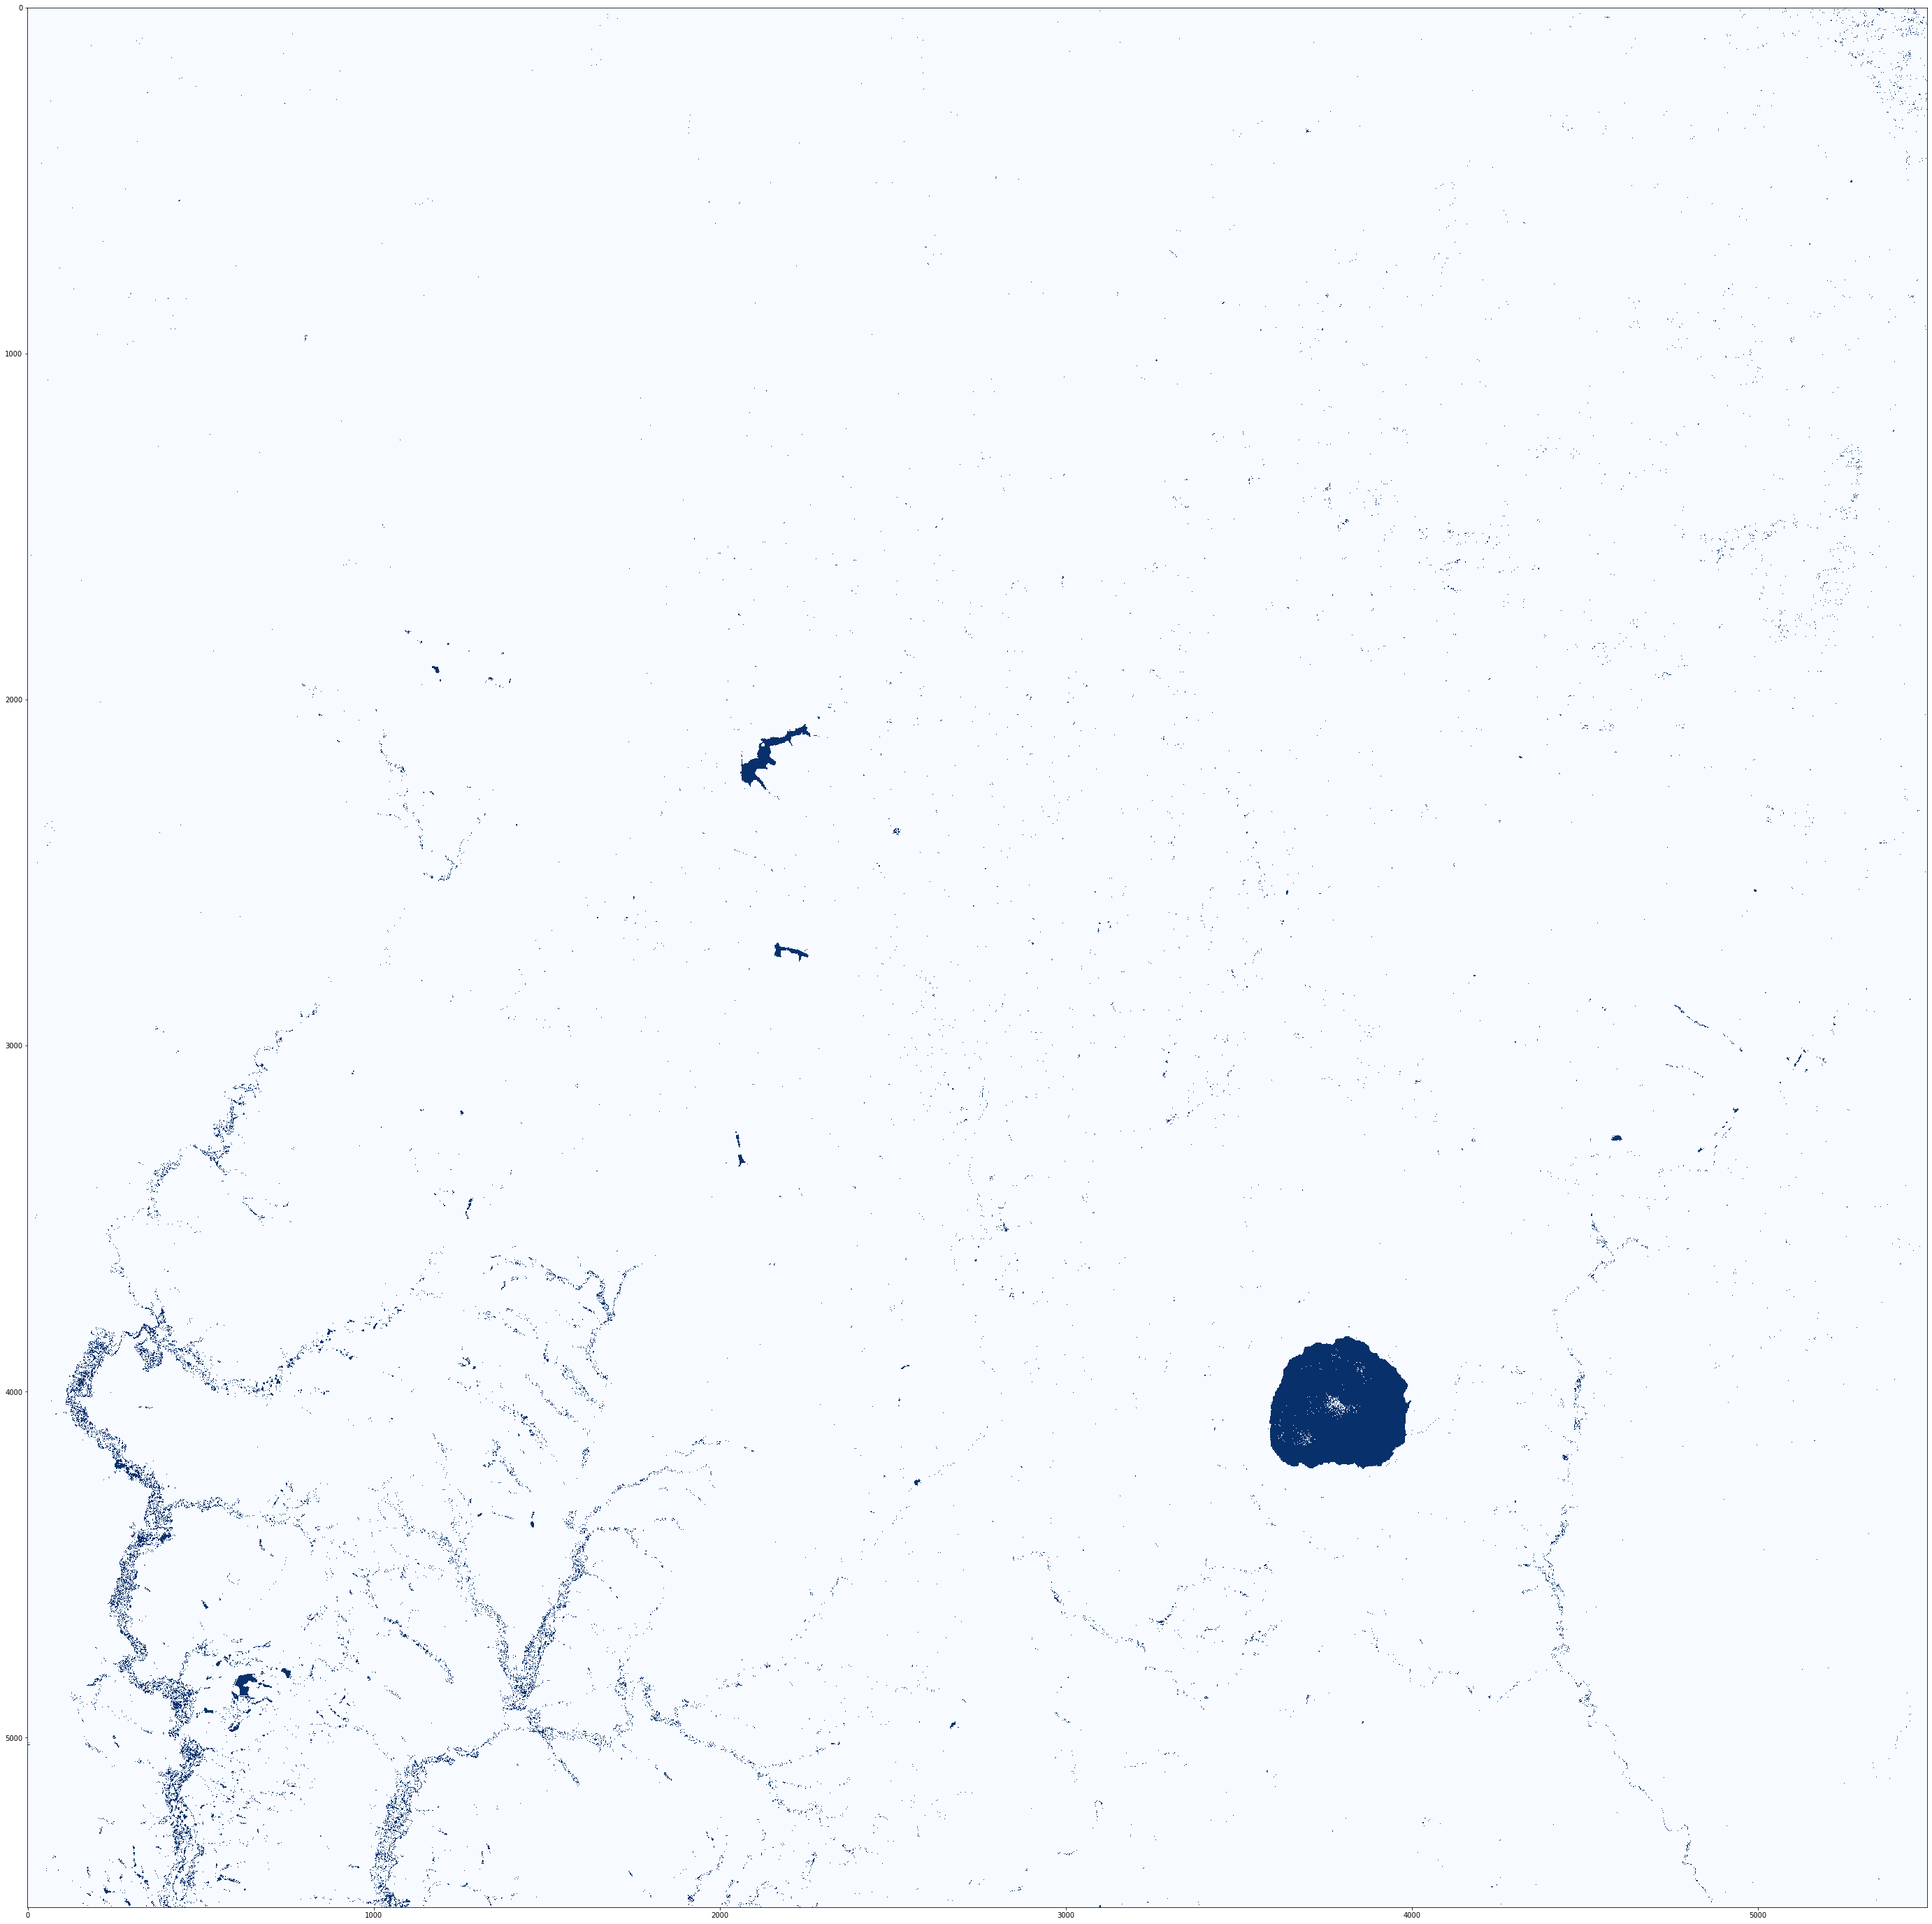

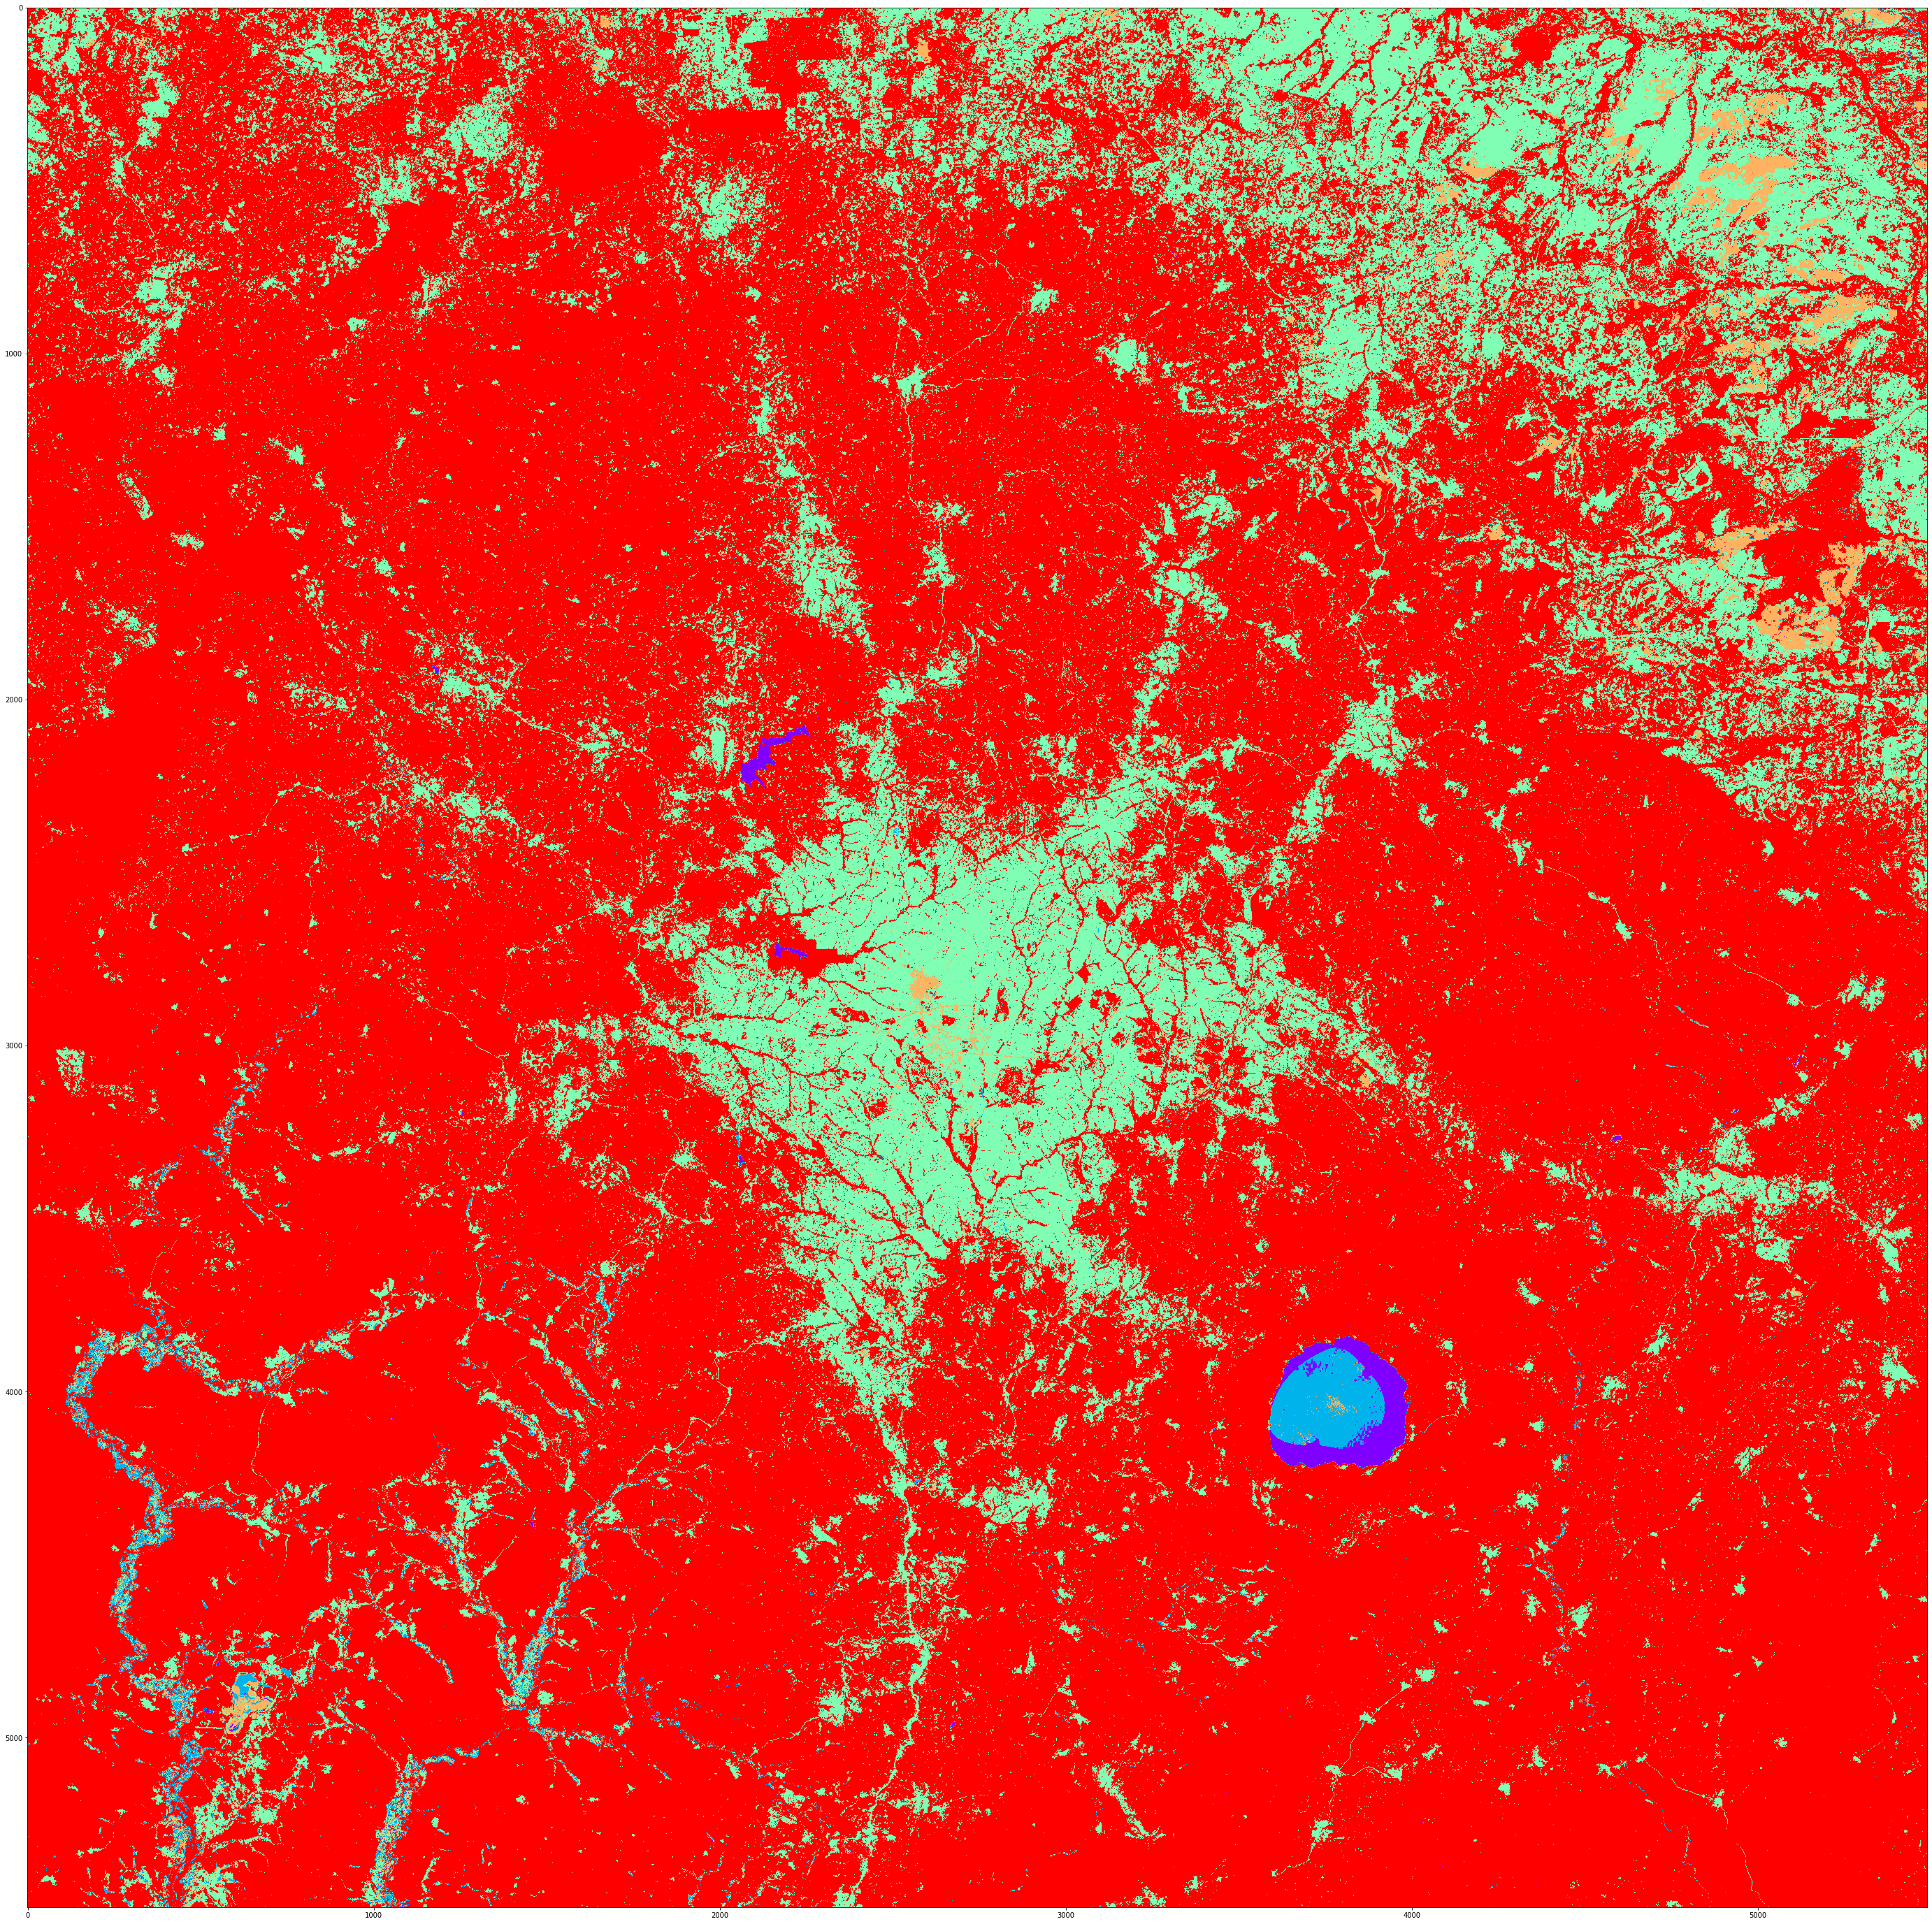

In [11]:
img = pred_lg_NW_020120_vill.reshape(dim_NW_020120)
Image.show_pred_5(img)
Image.show_pred(img, cmap = 'rainbow')

In [41]:
path = "H:/sentinel2/Ghana/Validation/02-01-20/NW/Agona.tif"
img = Image.make_dataset(path)
NW_020120_vill = img['df'][x_cols]
dim_NW_020120_vill = img['dim']

In [13]:
pred_lg_NW_020120_vill = LogReg.predict(NW_020120_vill)

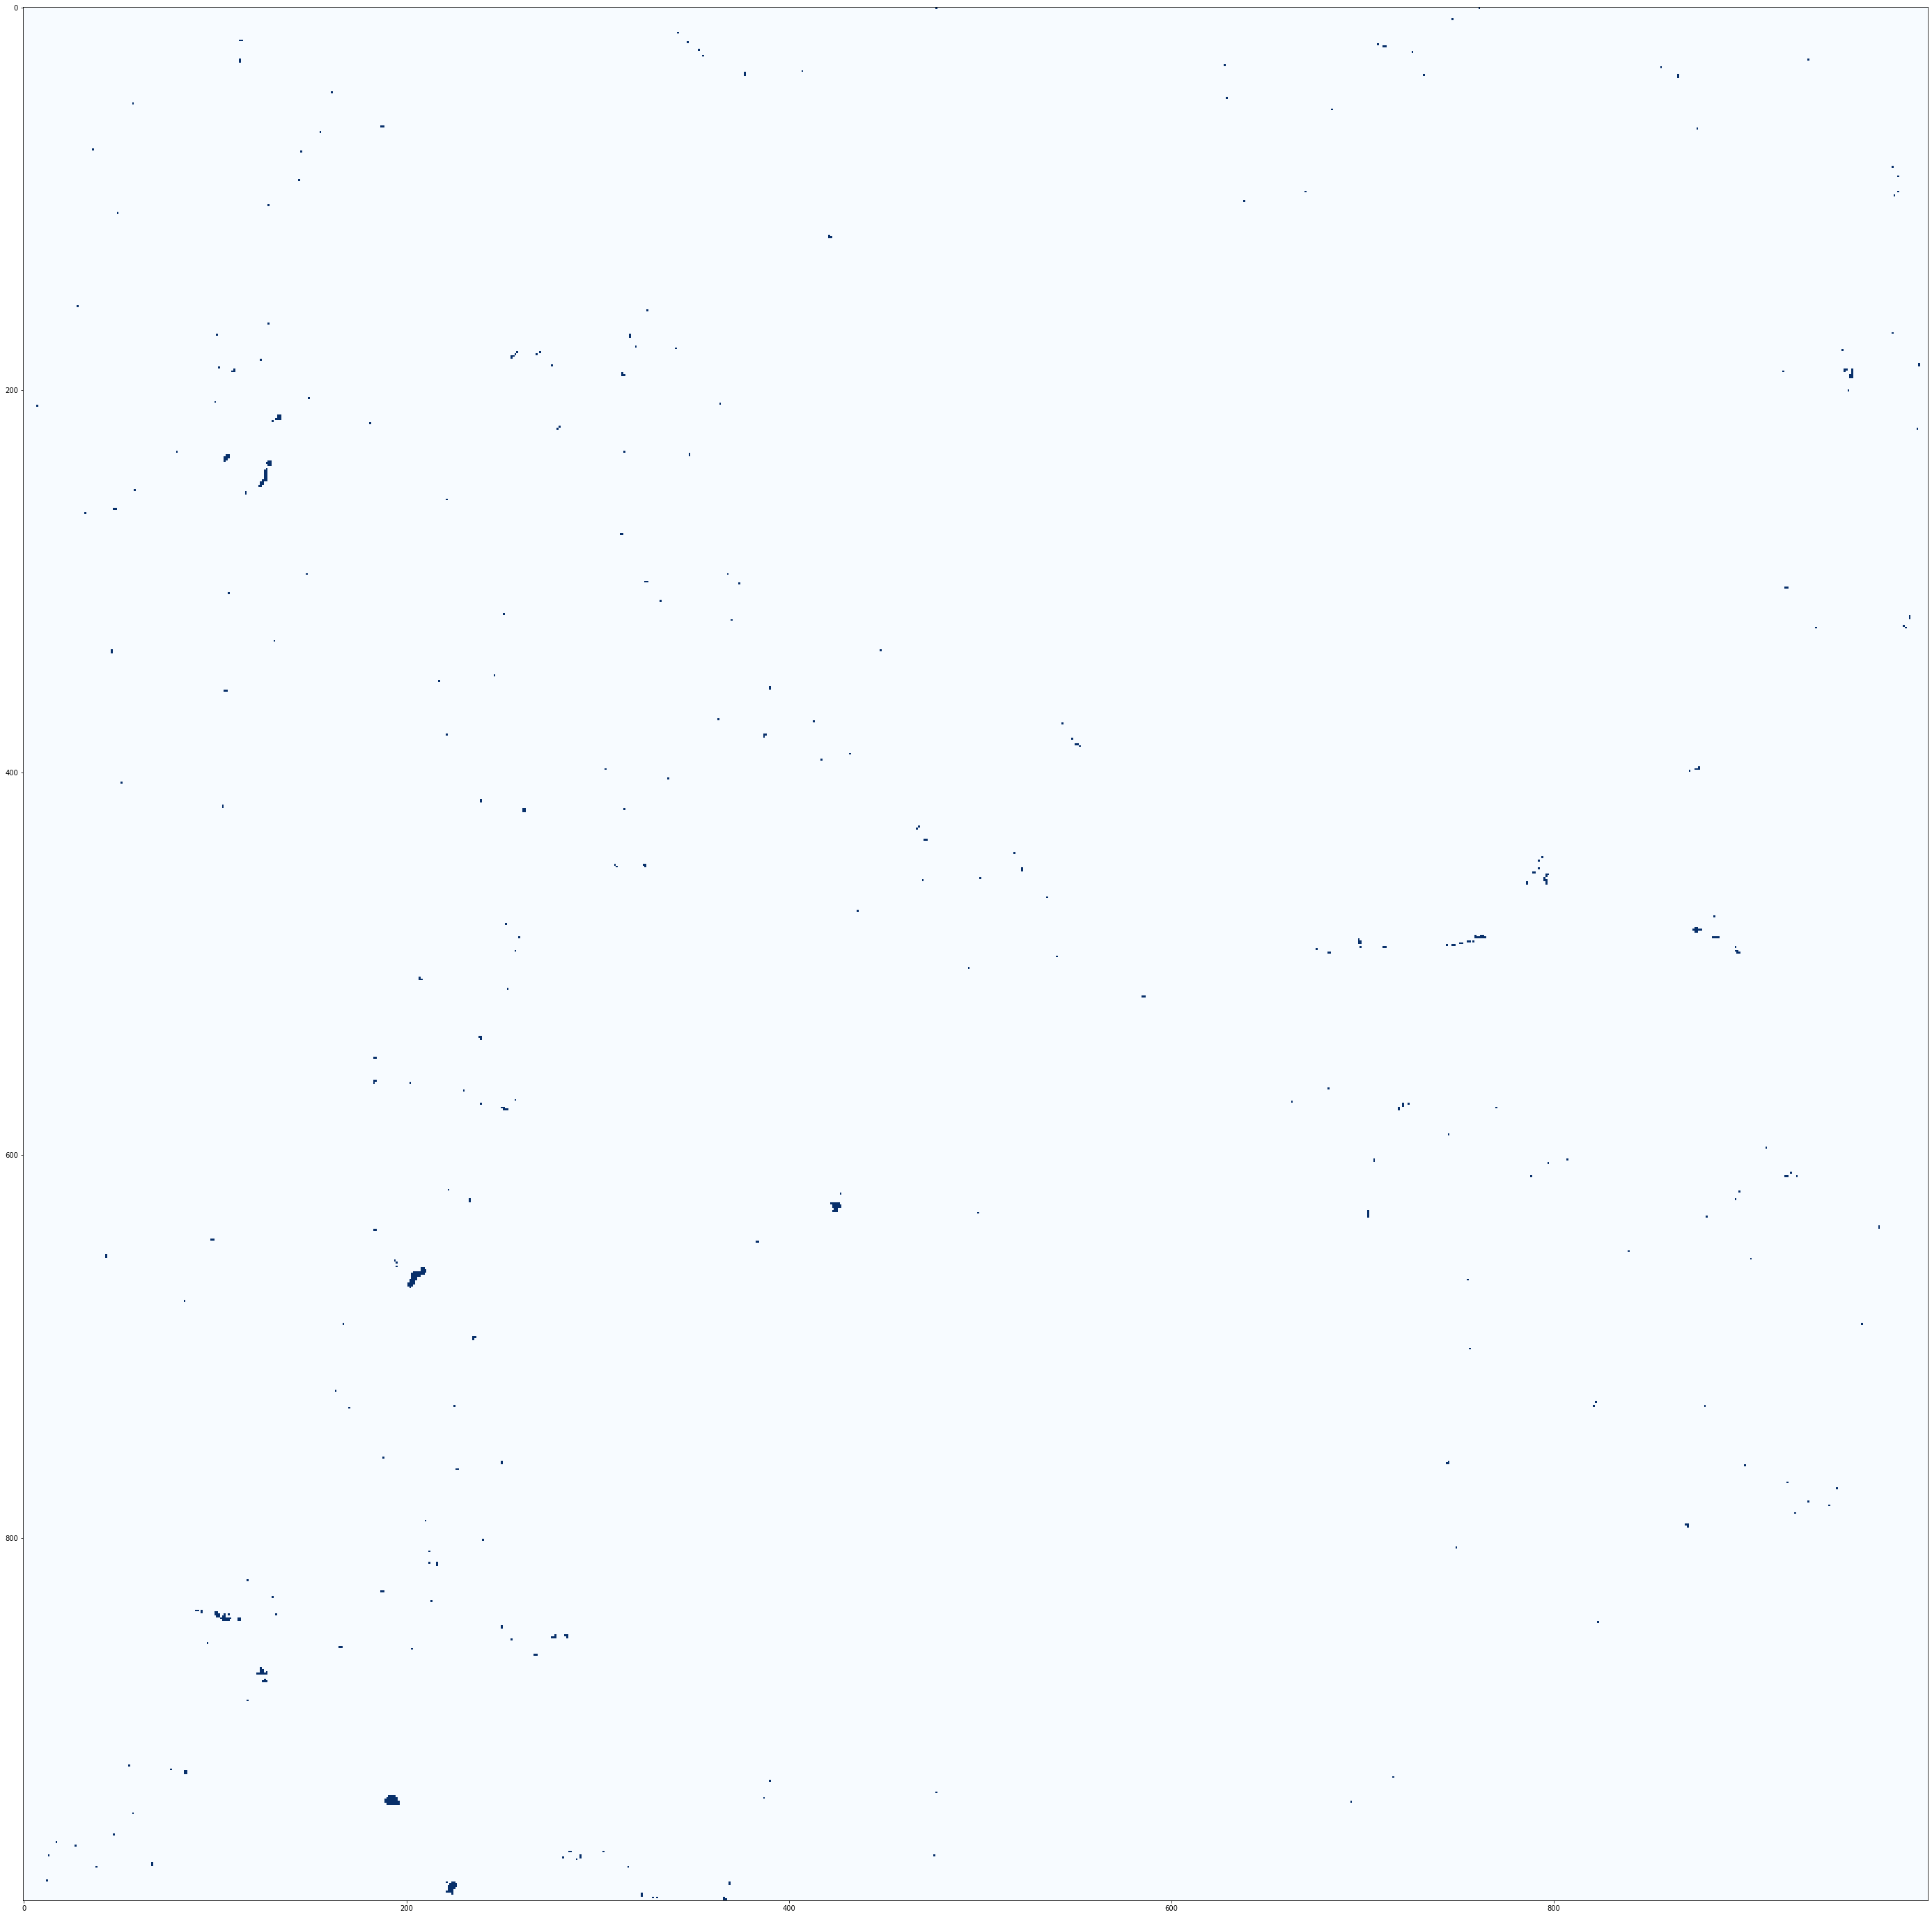

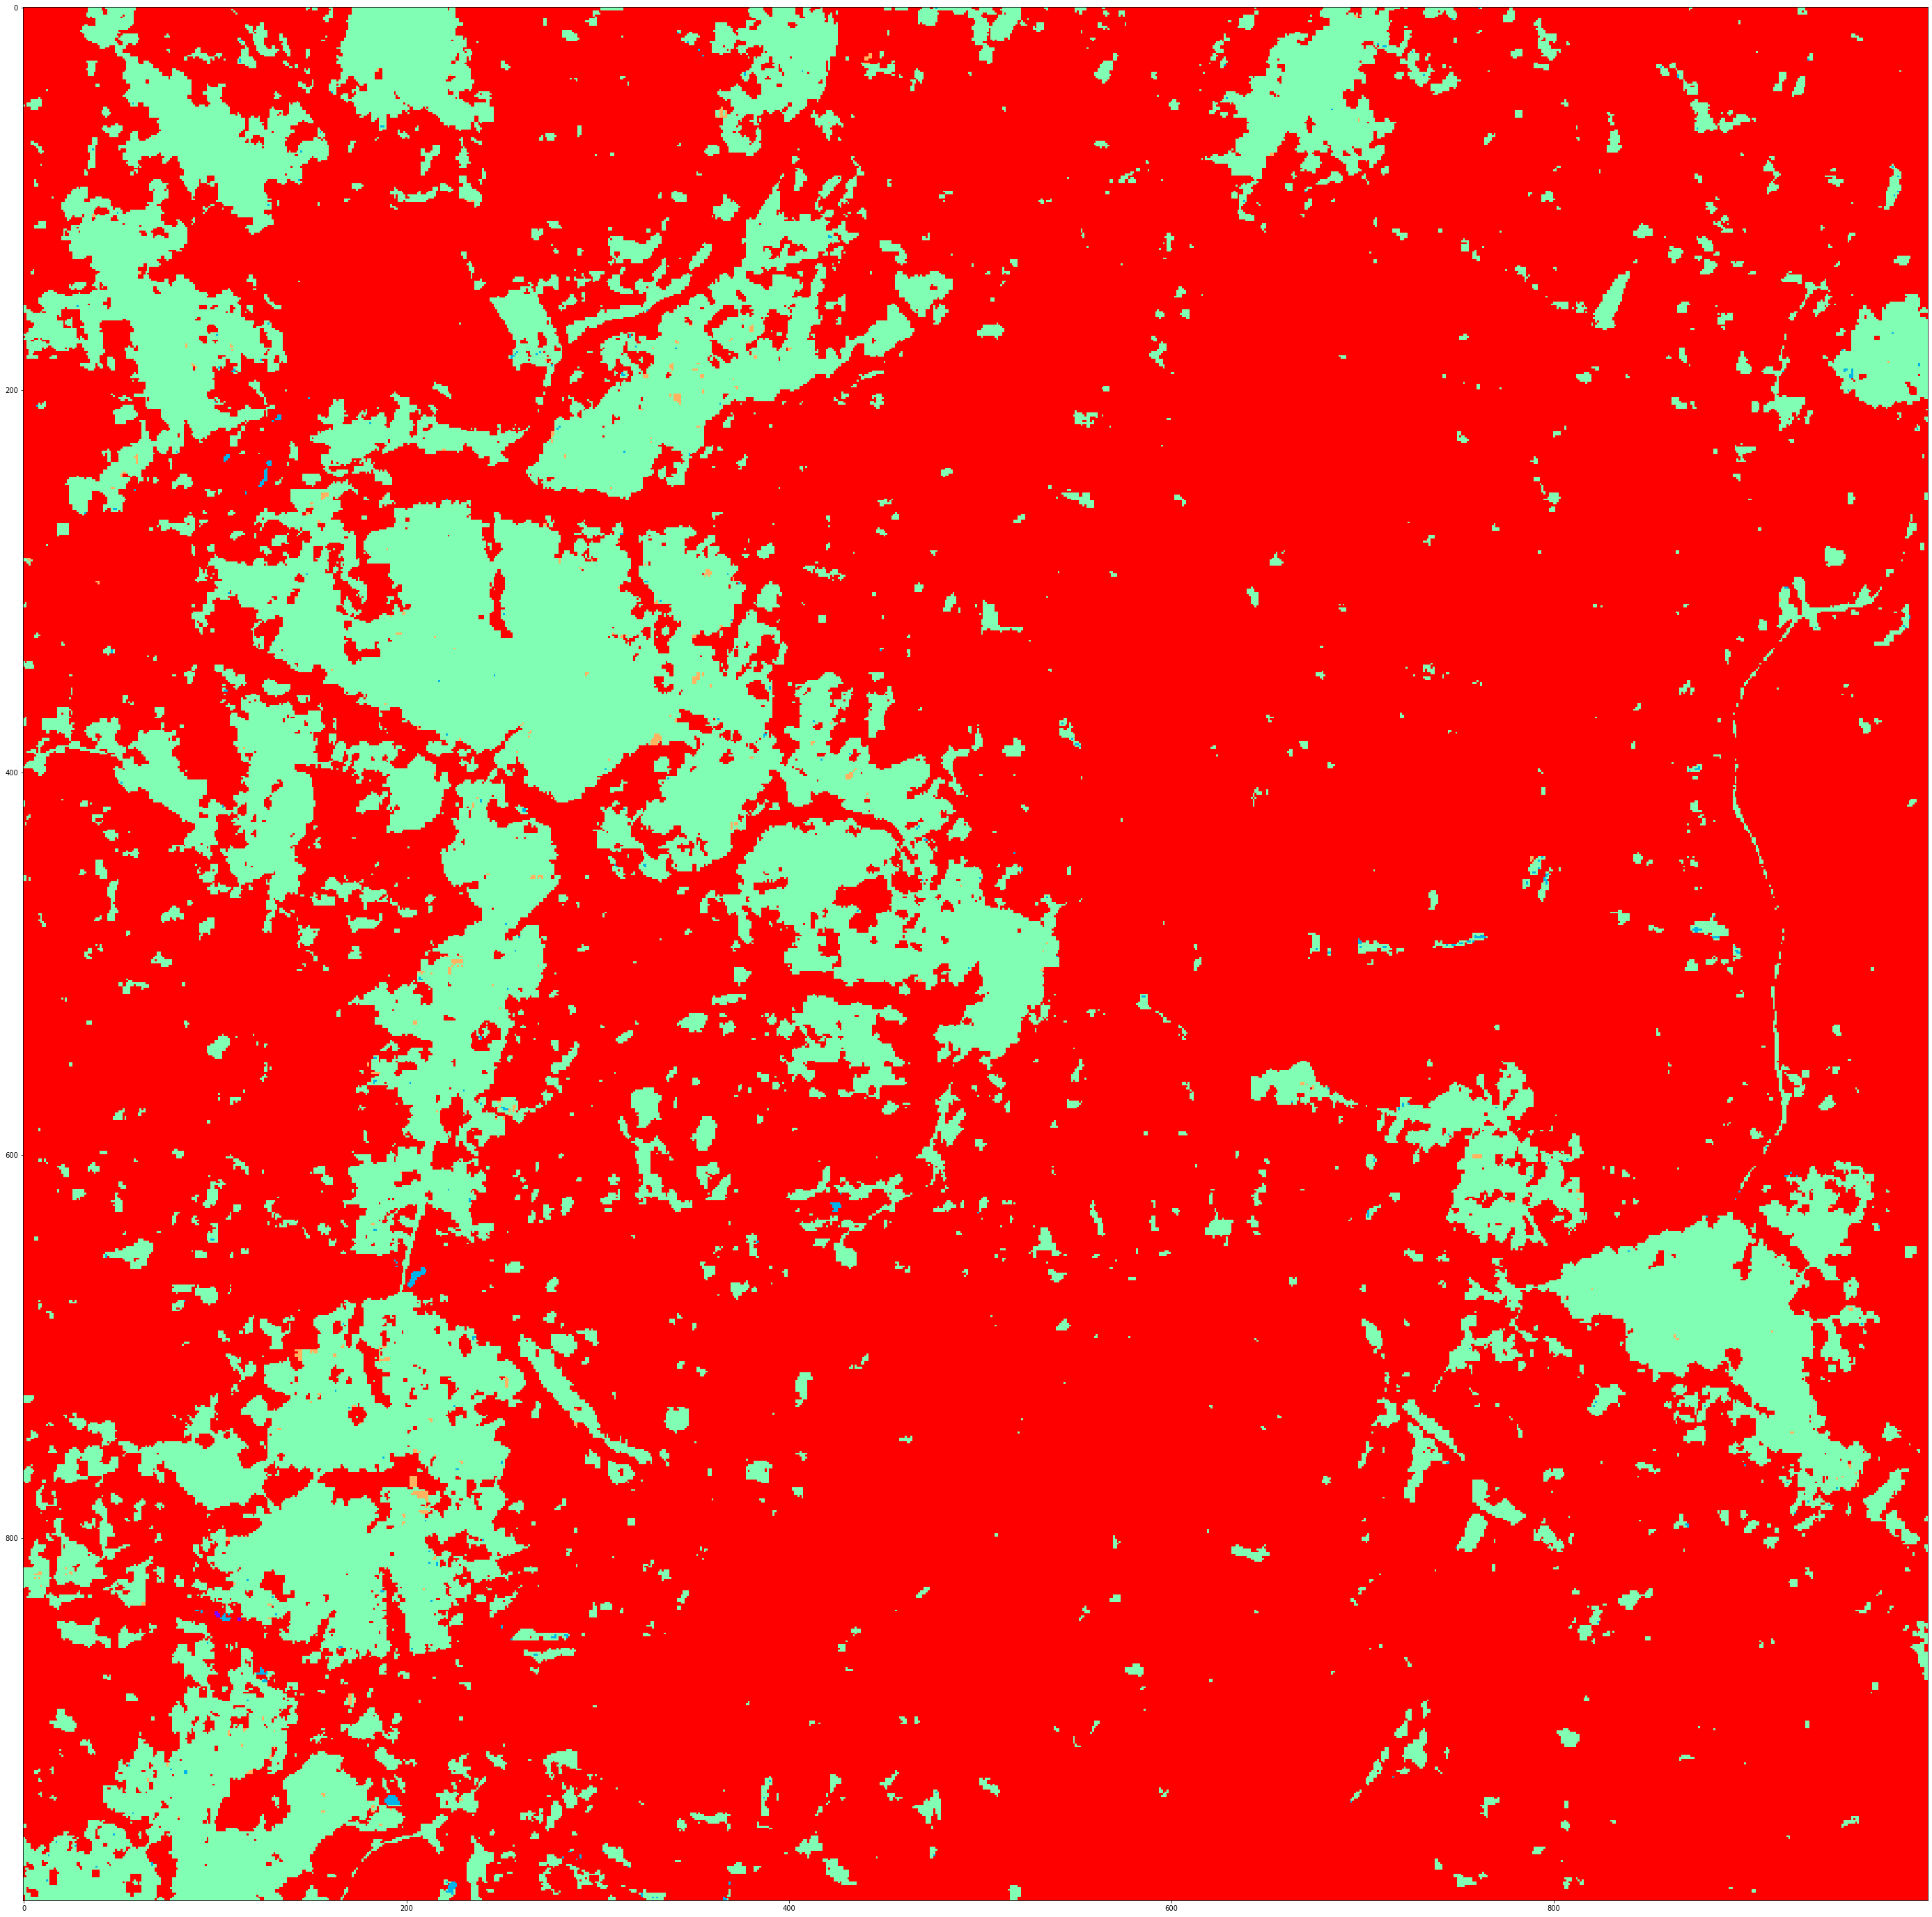

In [15]:
img = pred_lg_NW_020120_vill.reshape(dim_NW_020120_vill)
Image.show_pred_5(img)
Image.show_pred(img, cmap = 'rainbow')